## Google Timeline JSON Data Formatting

Download from: https://takeout.google.com/settings/takeout

In [2]:
import os
import sys
import json
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
# http://www.certainly-strange.com/?p=968

In [39]:
# Load google timeline data
locationData = "/Users/andybartle/Dropbox/GIS_database_projects/Google-timeline-extract-20180928/LocationHistory/LocationHistory.json"
#locationData = "trial-data.json"
with open(locationData) as data_file:
    data = json.load(data_file)
    df = pd.DataFrame.from_dict(data['locations'])
# View first 5 rows
df.head(5)

,accuracy,activity,altitude,heading,latitudeE7,longitudeE7,timestampMs,velocity,verticalAccuracy
0,15,NaN,1091.0,NaN,459175399,68675439,1538133408059,NaN,8.0
1,15,NaN,1091.0,NaN,459175399,68675439,1538132401032,NaN,8.0
2,15,"[{'timestampMs': '1538131547878', 'activity': ...",1091.0,NaN,459175399,68675439,1538131590095,NaN,8.0
3,15,"[{'timestampMs': '1538131122529', 'activity': ...",1091.0,NaN,459175399,68675439,1538130990064,NaN,8.0
4,15,NaN,1091.0,NaN,459175399,68675439,1538130095091,NaN,8.0


In [40]:
# Return size of data frame
rows, columns = df.shape
print("Rows: " + str(rows) + ", columns: " + str(columns))

# Return column headers
df.columns

Rows: 1013915, columns: 9


Index(['accuracy', 'activity', 'altitude', 'heading', 'latitudeE7',
       'longitudeE7', 'timestampMs', 'velocity', 'verticalAccuracy'],
      dtype='object')

In [ ]:
# Format time and location data so more useful
for index, row in df.iterrows():
    
    # Convert time from milliseconds to date and time
    rowDateTime = datetime.datetime.fromtimestamp(float(row['timestampMs'])/1000.0)
    rowDate = rowDateTime.strftime("%d-%m-%y")
    rowTime = rowDateTime.strftime("%H:%M:%S")
    df.loc[index, "Date"] = rowDate
    df.loc[index, "Time"] = rowTime
    
    # Covert lat and long from E7 format (expoent 1e7) to standard
    df.loc[index, "latitude"] = row['latitudeE7'] / 1e7
    df.loc[index, "longitude"] = row['longitudeE7'] / 1e7

# Remove original columns
df = df.drop(['latitudeE7', 'longitudeE7', 'timestampMs', 'activity', 'altitude', 'verticalAccuracy'], axis=1)
df.head(5)

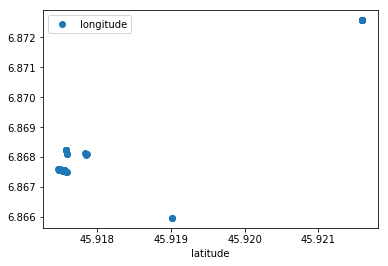

In [6]:
# Plot data
df.plot(x='latitude', y='longitude', style='o')

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
print("done")

done


In [7]:
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [18]:
# https://geopandas.readthedocs.io/en/latest/gallery/create_geopandas_from_pandas.html
# Create a tuple coordinates column for shapely object in geodataframe
df['Coordinates'] = list(zip(df.longitude, df.latitude))
# Transform tuples to points
df['Coordinates'] = df['Coordinates'].apply(Point)
# Create GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')
# Print GDF
print(gdf.head(5))

   accuracy  heading  velocity      Date      Time  latitude  longitude  \
0        15      NaN       NaN  28-09-18  23:16:48  45.91754   6.867544   
1        15      NaN       NaN  28-09-18  23:00:01  45.91754   6.867544   
2        15      NaN       NaN  28-09-18  22:46:30  45.91754   6.867544   
3        15      NaN       NaN  28-09-18  22:36:30  45.91754   6.867544   
4        15      NaN       NaN  28-09-18  22:21:35  45.91754   6.867544   

                    Coordinates  
0  POINT (6.8675439 45.9175399)  
1  POINT (6.8675439 45.9175399)  
2  POINT (6.8675439 45.9175399)  
3  POINT (6.8675439 45.9175399)  
4  POINT (6.8675439 45.9175399)  


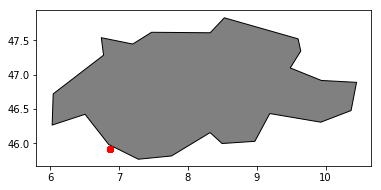

In [38]:
# Finally, we plot the coordinates over a country-level map.
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.name == 'Switzerland'].plot(
    color='grey', edgecolor='black')

# We can now plot our GeoDataFrame.
gdf.plot(ax=ax, color='red')

plt.show()

In [4]:
!conda list

# packages in environment at /Users/andybartle/anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py36_0  
alabaster                 0.7.12                   py36_0  
anaconda                  5.1.0                    py36_2  
anaconda-client           1.7.2                    py36_0  
anaconda-navigator        1.9.6                    py36_0  
anaconda-project          0.8.2                    py36_0  
appnope                   0.1.0            py36hf537a9a_0  
appscript                 1.0.1            py36h1de35cc_1  
asn1crypto                0.24.0                   py36_0  
astroid                   2.1.0                    py36_0  
astropy                   3.1              py36h1de35cc_0  
atomicwrites              1.2.1                    py36_0  
attrs                     18.2.0           py36h28b3542_0  
babel                     2.6.0                    py36_0  
backcall                  0.1.0  

In [ ]:
# https://towardsdatascience.com/how-to-make-a-gif-map-using-python-geopandas-and-matplotlib-cd8827cefbc8
